#Задача регрессии.
##Воспользуемся датасетом Song Popularity Dataset с Kaggle.

В последнее время было проведено множество исследований, чтобы понять песни и их популярность на основе определенных факторов. Такие образцы песен разбиваются, а их параметры записываются и сводятся в таблицы. Основная цель — предсказать популярность песни.

Проект прост, но сложен: предсказать популярность песни на основе энергии, акустики, инструментальности, живости, танцевальности и т. д. Набор данных большой, и его сложность возникает из-за сильной мультиколлинеарности.
Датасет составлен на основе данных, предоставленных сервисом стриминга музыки Spotify.

Для начала подгрузим этот датасет в Google Collab с памяти компьютера

In [1]:
import pandas as pd
import seaborn as sns
import io
from google.colab import files
uploaded = files.upload()
data_raw = pd.read_csv(io.BytesIO(uploaded['song_data.csv']))
#path = '/content/song_data.csv'
#data_raw = pd.read_csv(path)

Saving song_data.csv to song_data.csv


Посмотрим размер датасета и выведем часть его элементов:

In [2]:
data_raw.shape

(18835, 15)

In [3]:
data_raw

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


Мы видим, что столбцы (признаки) имеют имена:


*   song_name - название трека.
*   song_popularity - популярность мелодии, значение будет между 0 и 100, причем 100 является самым популярным. Популярность рассчитывается алгоритмом и по большей части зависит от общего количества воспроизведений трека и того, насколько недавно они были воспроизведены. Вообще говоря, песни, которые часто играют сейчас, будут иметь более высокую популярность, чем песни, которые часто играли в прошлом.
*   song_duration_ms - длительность трека в миллисекундах
*   acousticness - мера уверенности в том, что композиция является акустической в интервале от 0.0 до 1.0. Значение 1.0 обозначает высокую уверенность в том, что композиция акустическая.
*   danceability - описывает пригодность дорожки для танцев на основании таких музыкальных элементов, как темп, стабильность ритма, сила долей и общее постоянство. Композиции со значением 0.0 наименее танцевальные, со значением 1.0 — наиболее танцевальные.
*   energy - это величина в интервале от 0.0 до 1.0, характеризующая критерий восприятия «яркости» и «активности» песни. Обычно энергичные композиции быстрые, громкие и шумные. Например, высокой энергией обладает death metal, а прелюдия Баха имеет по этой шкале низкие показатели.
*   instrumentalness - прогнозирует, что в треке нет вокала. В этом контексте звуки «оу» и «а-а-а» считаются инструментальными. Рэп или треки со словами очевидно являются «вокальными». Чем ближе значение инструментальности к 1.0, тем выше вероятность того, что в треке не содержится голоса.
*   key - тональность трека.
*   liveness - распознаёт присутствие в записи слушателей. Чем больше значения liveness, тем выше вероятность того, что песня исполнялась вживую. Значение выше 0.8 даёт серьёзную уверенность в живом исполнении.
*   loudness - общая громкость трека в децибелах (дБ). Значения громкости усредняются по всей дорожке и полезны для сравнения относительной громкости дорожек. Громкость — это качество звука, которое является основным психологическим коррелятом физической силы (амплитуда). Типичный диапазон значений от -60 до 0 дБ.
*   audio_mode - указывает мажорная или минорная тональность трека, тип гаммы, на основе которой формируется его мелодическое содержание. Мажор обозначается цифрой 1, а минор — 0.
*   speechiness - обнаруживает присутствие произнесенных слов в треке. Чем больше запись похожа на речь (например, ток-шоу, аудиокнига, стихи), тем ближе к 1,0 значение атрибута. Значения выше 0,66 описывают треки, которые, вероятно, полностью состоят из произнесенных слов. Значения от 0,33 до 0,66 описывают треки, которые могут содержать как музыку, так и речь, либо в разделах, либо в слоях, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, соответствуют музыке и другим трекам, не похожим на речь.
*   tempo - общий расчетный темп трека в ударах в минуту (BPM). В музыкальной терминологии темп — это скорость или темп данного произведения, который напрямую зависит от средней длительности доли.
*   time_signature - предполагаемый тактовый размер трека. Тактовый размер (метр) — это условное обозначение, указывающее, сколько долей содержится в каждом такте (или такте).
*   audio_valence - показатель от 0,0 до 1,0, характеризующий музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно (например, счастливые, веселые, эйфорические), тогда как треки с низкой валентностью звучат более негативно (например, грустные, депрессивные,злые.



















In [5]:
data_raw.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


Проверим датасет на наличие повторов:

In [6]:
data_raw.describe(include = ['object'])

,song_name
count,18835
unique,13070
top,Better
freq,21


Как мы можем наблюдать в датасете есть около 13070 элементов и 5765 повторов. Удалим повторы:

In [7]:
data_raw = data_raw.drop_duplicates(subset=['song_name'])
data_raw.shape

(13070, 15)

Проверим датасет на наличие пустых значений. Как видим, их нет:

In [8]:
data_raw.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

Проверим датасет на наличие выбросов. Построим ящик с усами для поля song_duration.

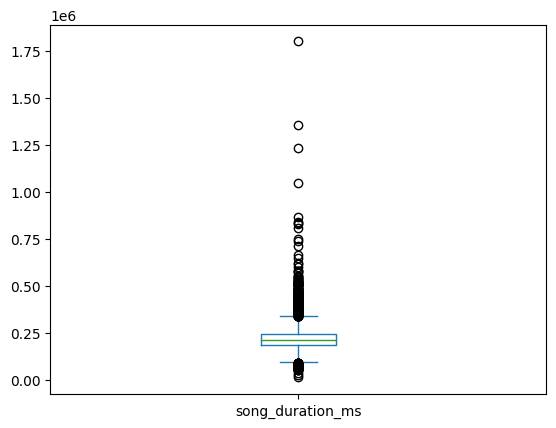

In [9]:
data_raw['song_duration_ms'].plot(kind='box')
pass

Удалим все выбросы в поле song_duration_ms, так как там "странные" долгие композиции.
Удалим все строки таблицы, в которых 'song_duration_ms' выходит за пределы квантилей 0.005, 0.995.

In [10]:
rows_to_drop = data_raw[
    (data_raw['song_duration_ms'] < data_raw['song_duration_ms'].quantile(0.005)) | (data_raw['song_duration_ms'] > data_raw['song_duration_ms'].quantile(0.995))].index
data_raw = data_raw.drop(rows_to_drop)
data_raw.shape

(12938, 15)

Выведем ящик с усами.

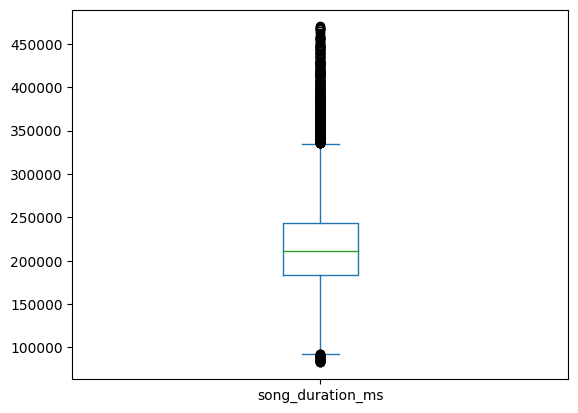

In [11]:
data_raw['song_duration_ms'].plot(kind='box')
pass

Закончив обработку данных, будем с ними работать уже как с переменной data

In [12]:
data = data_raw

Выведем матрицу корелляции без поля key, так как тональность является категориальным признаком:

In [13]:
corr_mat = data.drop(['key'], axis = 1).corr(numeric_only=True)
corr_mat

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,0.001279,-0.035519,0.052086,-0.012620,-0.091236,-0.032611,0.051035,0.000239,0.004447,-0.028655,0.019360,-0.050513
song_duration_ms,0.001279,1.000000,-0.131019,-0.076116,0.103956,-0.028362,0.007026,0.041922,-0.034783,-0.081330,0.009023,-0.006494,-0.070628
acousticness,-0.035519,-0.131019,1.000000,-0.181124,-0.679860,0.178052,-0.090549,-0.570477,0.063491,-0.106920,-0.142405,-0.157341,-0.123743
danceability,0.052086,-0.076116,-0.181124,1.000000,0.064847,-0.130688,-0.092948,0.181936,-0.100991,0.204170,-0.128970,0.137094,0.350644
energy,-0.012620,0.103956,-0.679860,0.064847,1.000000,-0.223328,0.177514,0.769678,-0.050304,0.088943,0.178134,0.150977,0.314810
instrumentalness,-0.091236,-0.028362,0.178052,-0.130688,-0.223328,1.000000,-0.042195,-0.398923,-0.015146,-0.087535,-0.042739,-0.067493,-0.206810
liveness,-0.032611,0.007026,-0.090549,-0.092948,0.177514,-0.042195,1.000000,0.116122,-0.008149,0.090163,0.026456,0.013171,0.016719
loudness,0.051035,0.041922,-0.570477,0.181936,0.769678,-0.398923,0.116122,1.000000,-0.059987,0.097439,0.140836,0.118468,0.214789
audio_mode,0.000239,-0.034783,0.063491,-0.100991,-0.050304,-0.015146,-0.008149,-0.059987,1.000000,-0.116639,0.022908,-0.024477,0.002623
speechiness,0.004447,-0.081330,-0.106920,0.204170,0.088943,-0.087535,0.090163,0.097439,-0.116639,1.000000,0.057539,0.052795,0.011072


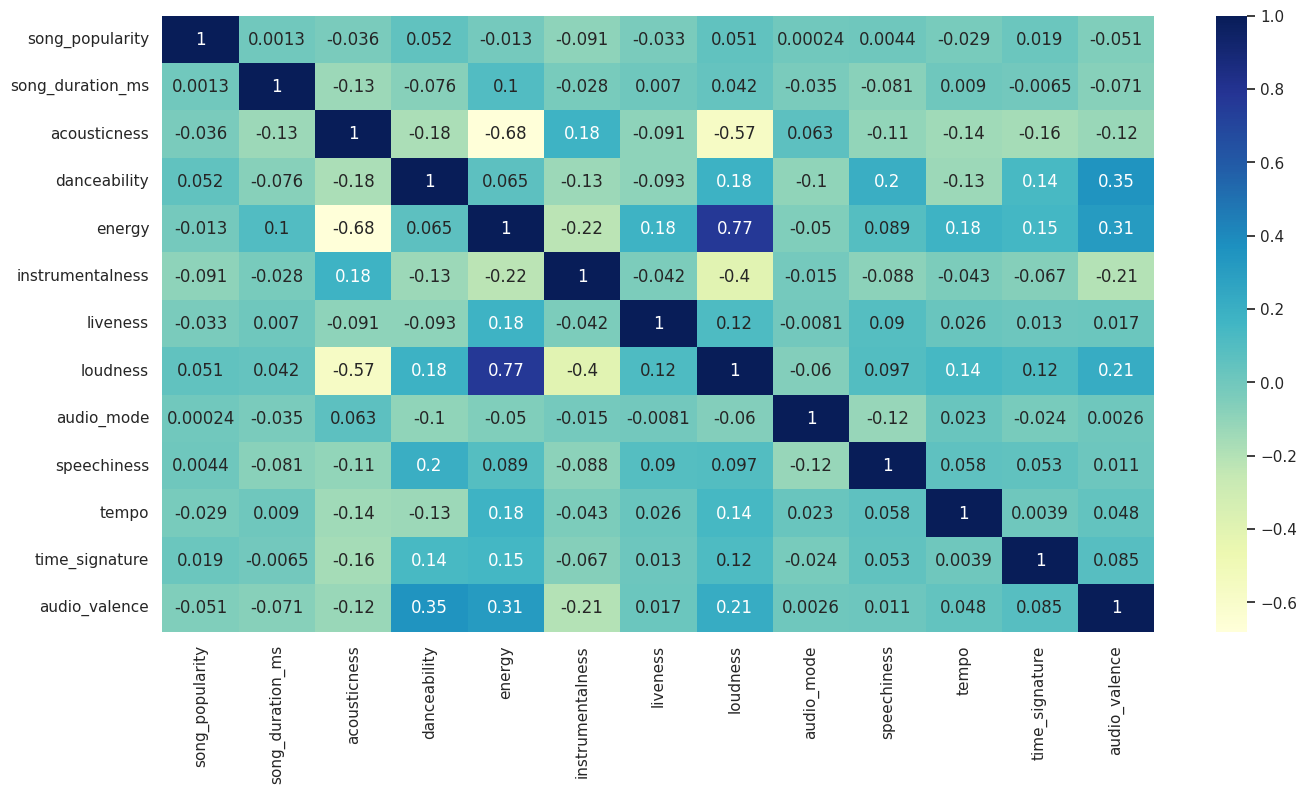

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = data.drop(['key'], axis = 1).corr(numeric_only=True)
sns.heatmap(corr,annot=True, cmap="YlGnBu")
pass

Как мы видим, song_popularity положительно коррелирует с danceability, loudness, speechiness и отрицательно коррелирует с acousticness, instrumentalness, liveness и audio_valence.
Построим часть этих графиков  для визуализации корреляции:

##Танцевальность от популярности:

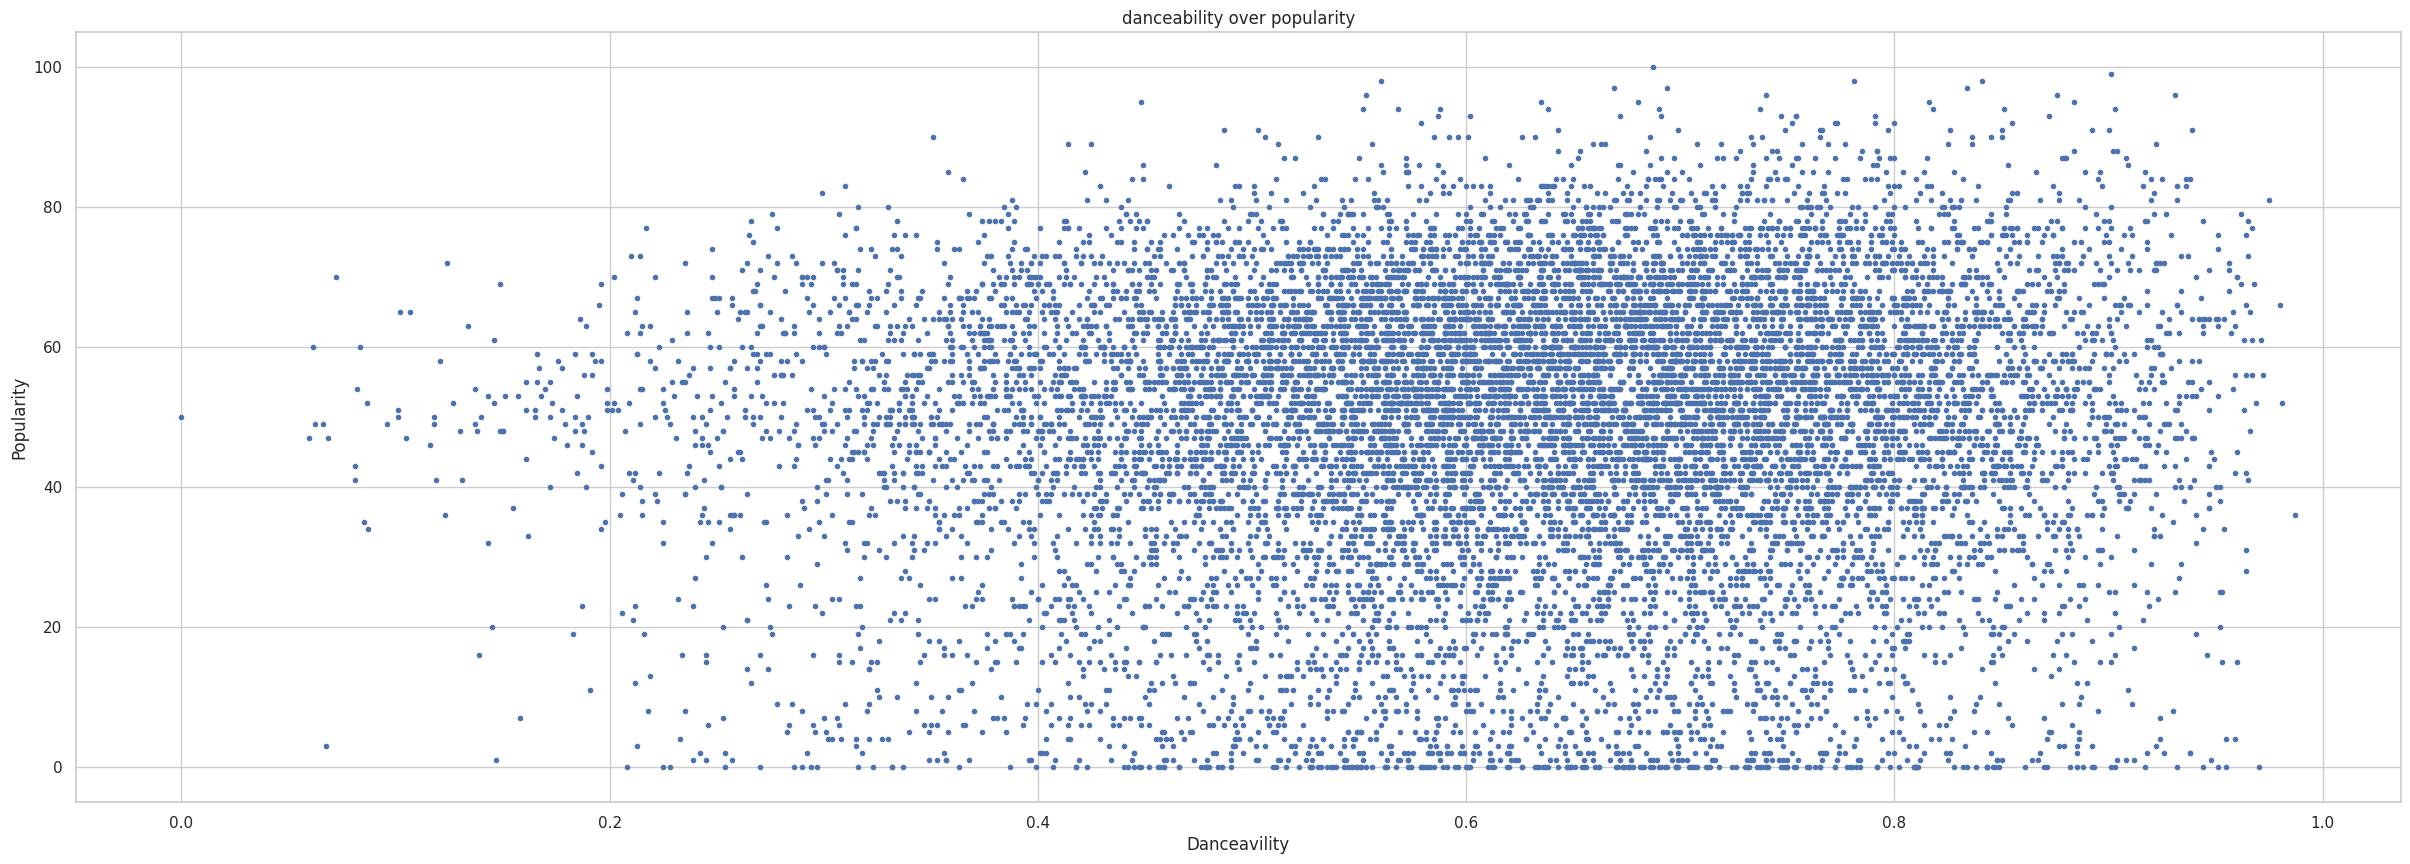

In [15]:
plt.figure(figsize=(30, 10))

xs = data["danceability"].to_numpy()
ys = data["song_popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('Danceavility')
plt.title("danceability over popularity")
plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean danceability for song popularity')

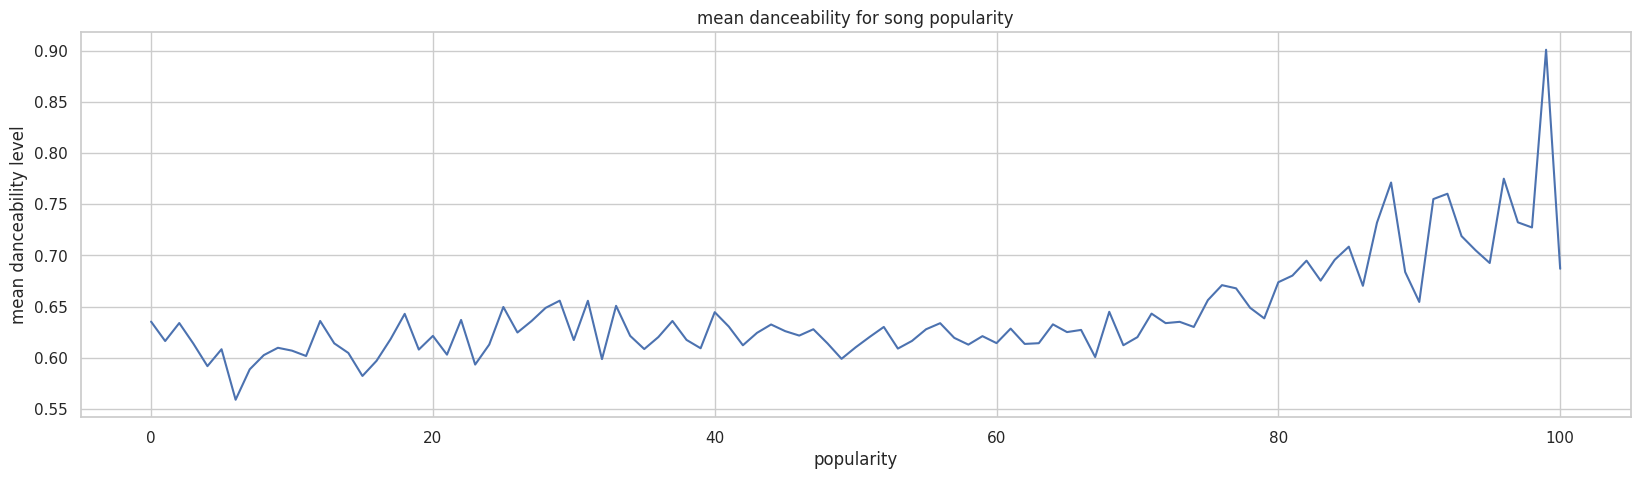

In [16]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = data.groupby("song_popularity")["danceability"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean danceability level')
axis.set_xlabel('popularity')
axis.set_title("mean danceability for song popularity")

#'Живость' трека от популярности

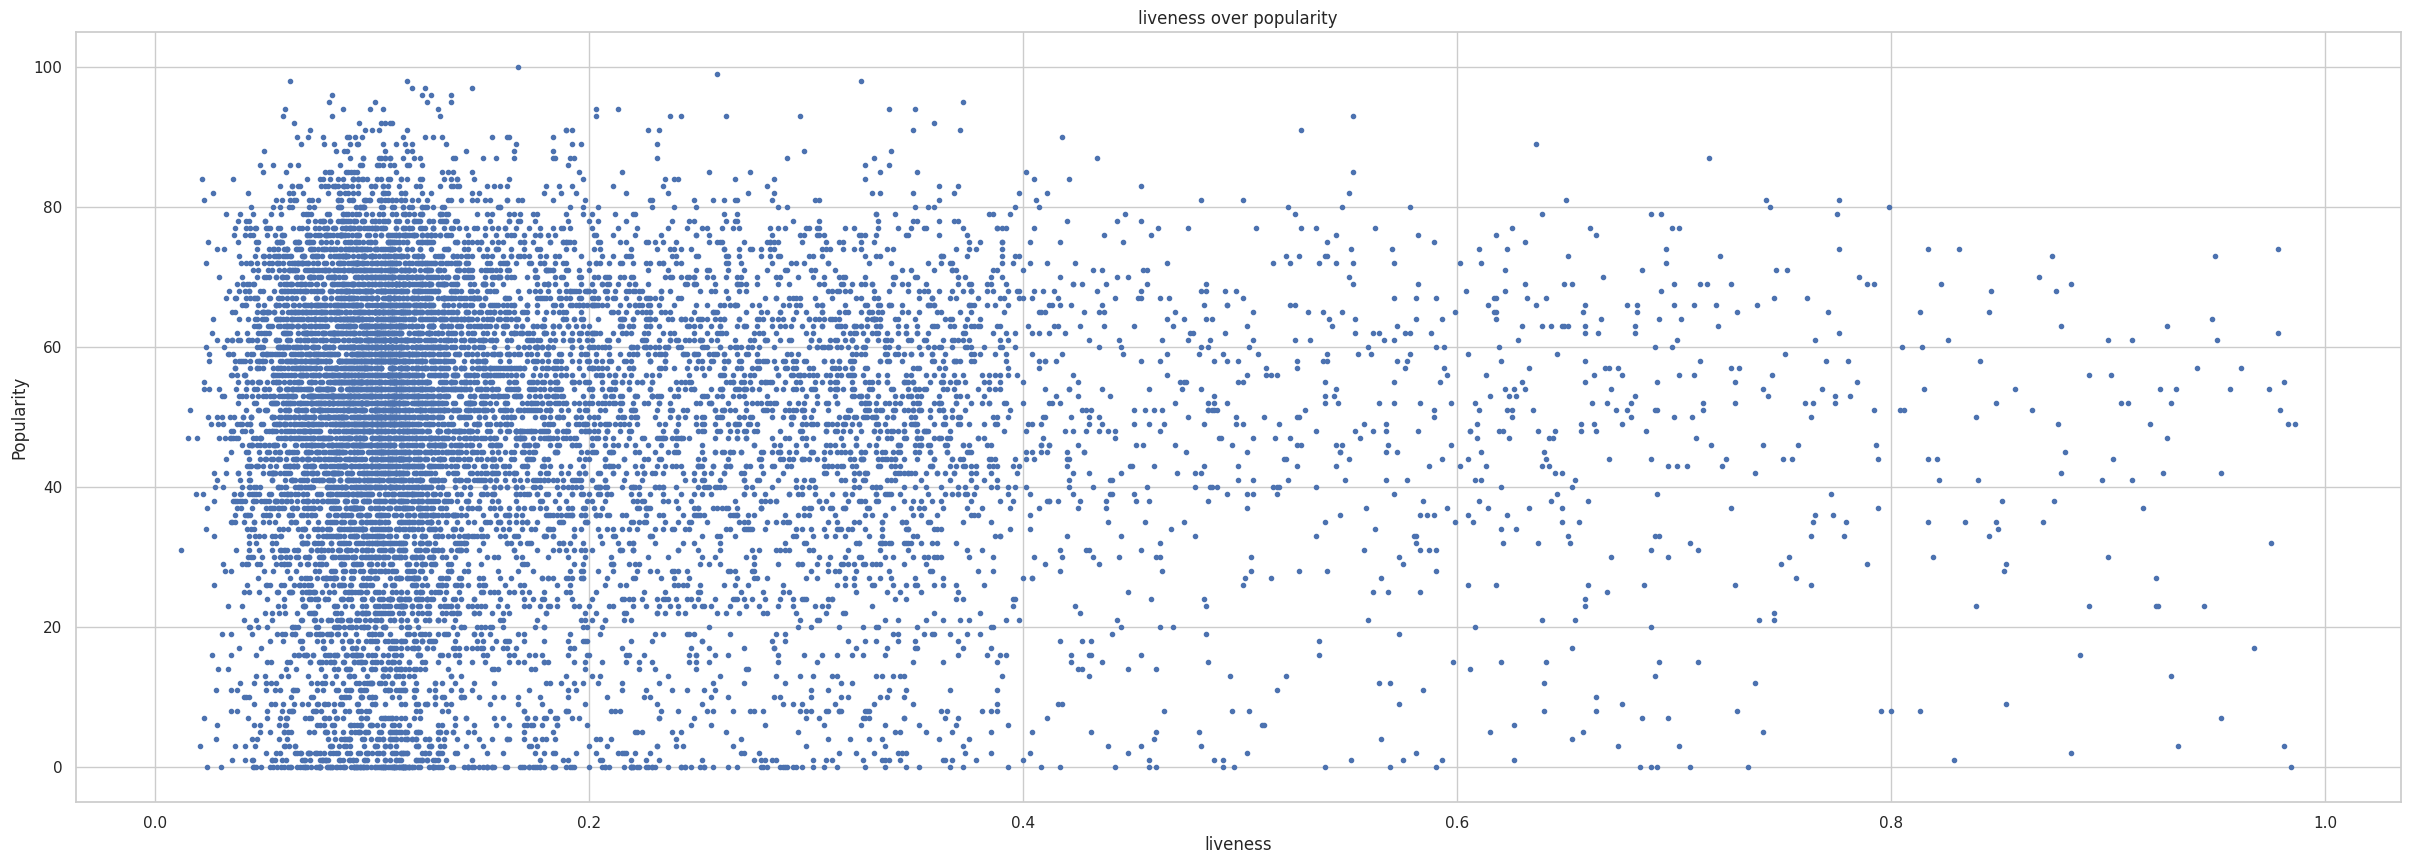

In [17]:
plt.figure(figsize=(30, 10))

xs = data["liveness"].to_numpy()
ys = data["song_popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('liveness')
plt.title("liveness over popularity")
plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean liveness for song popularity')

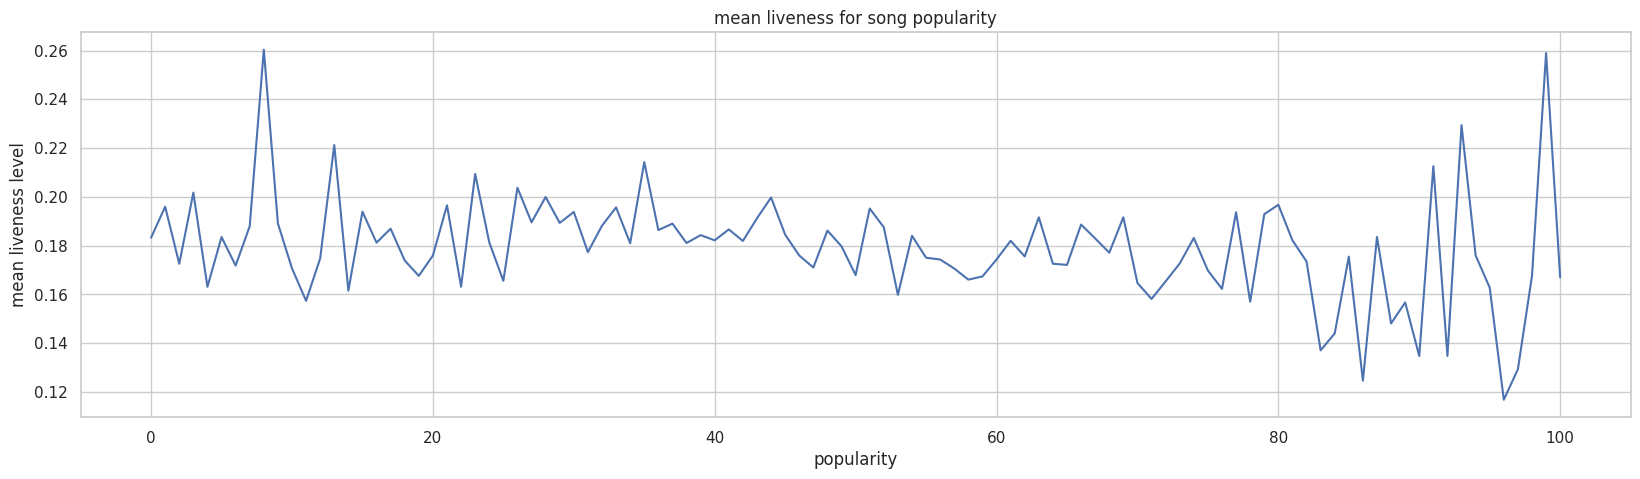

In [18]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = data.groupby("song_popularity")["liveness"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean liveness level')
axis.set_xlabel('popularity')
axis.set_title("mean liveness for song popularity")

#Громкость от популярности

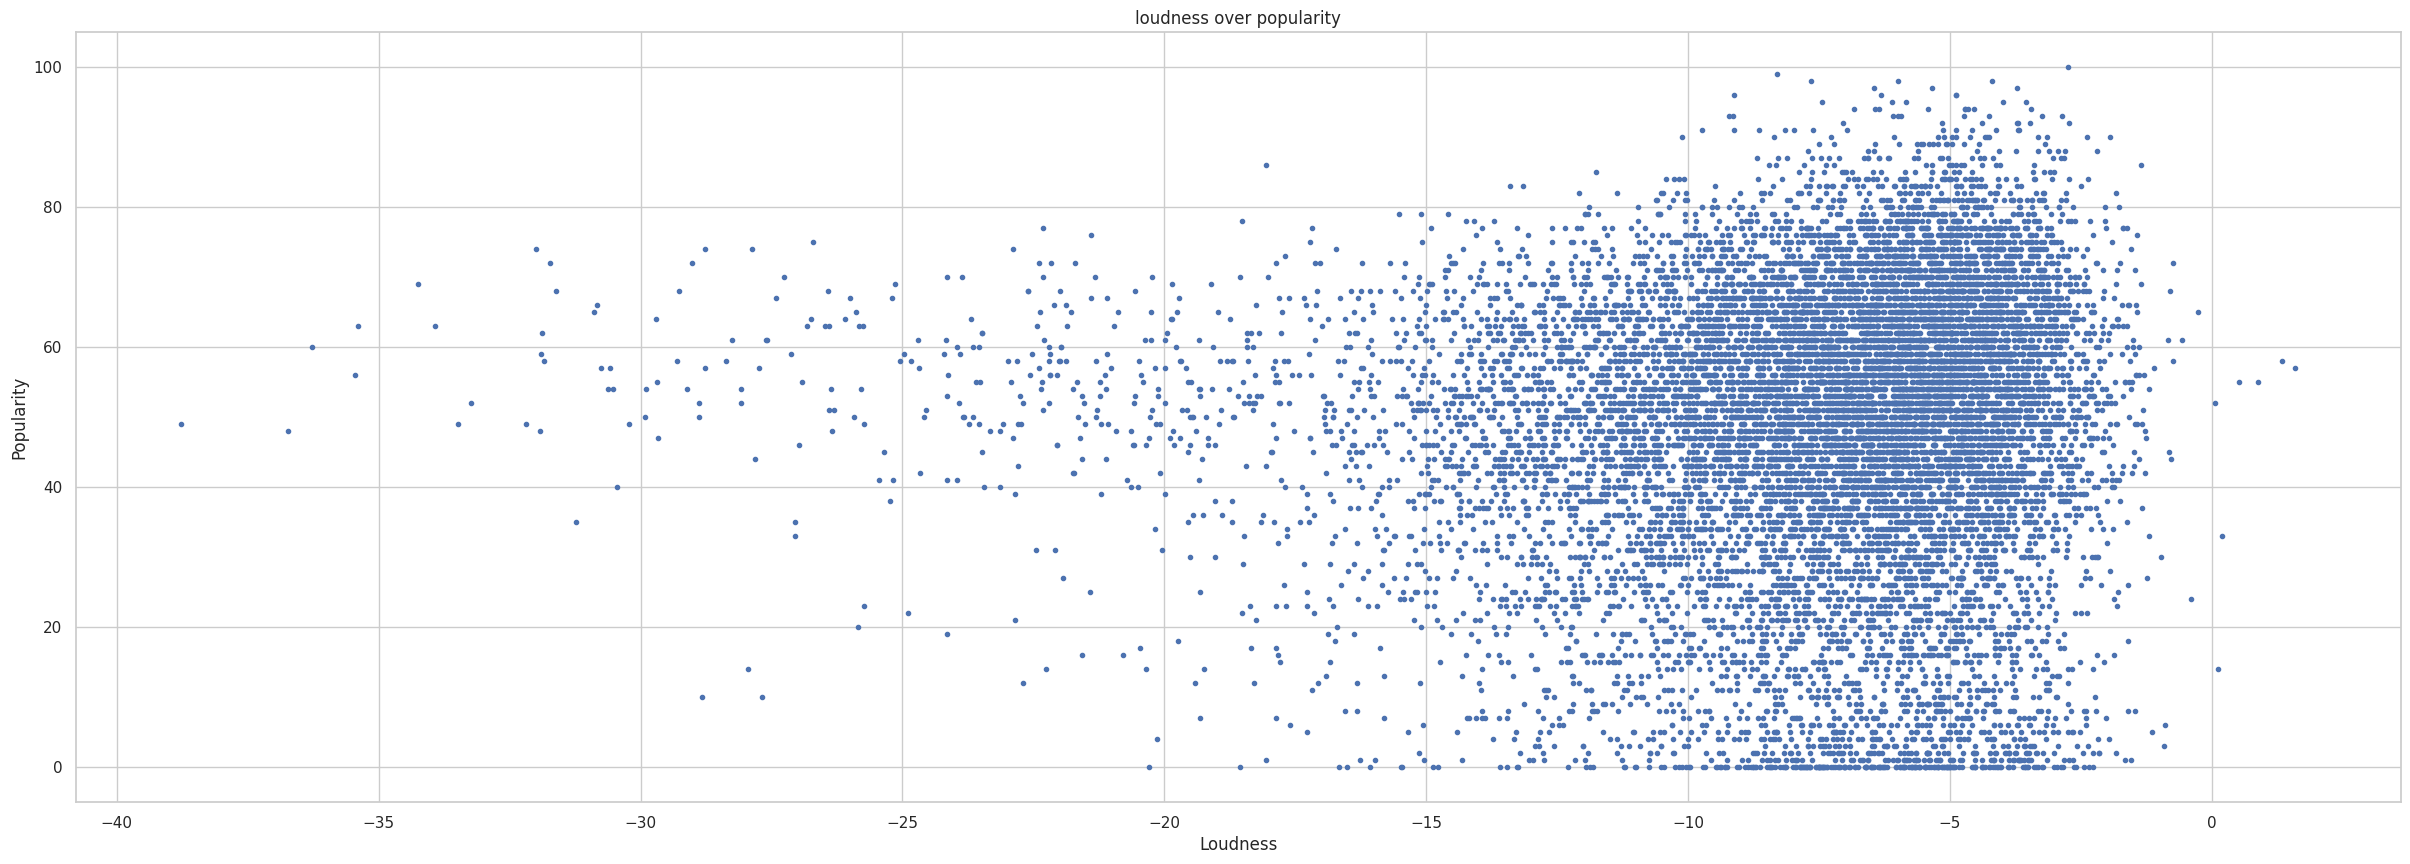

In [19]:
plt.figure(figsize=(30, 10))

xs = data["loudness"].to_numpy()
ys = data["song_popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('Loudness')
plt.title("loudness over popularity")
plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean loudness for song popularity')

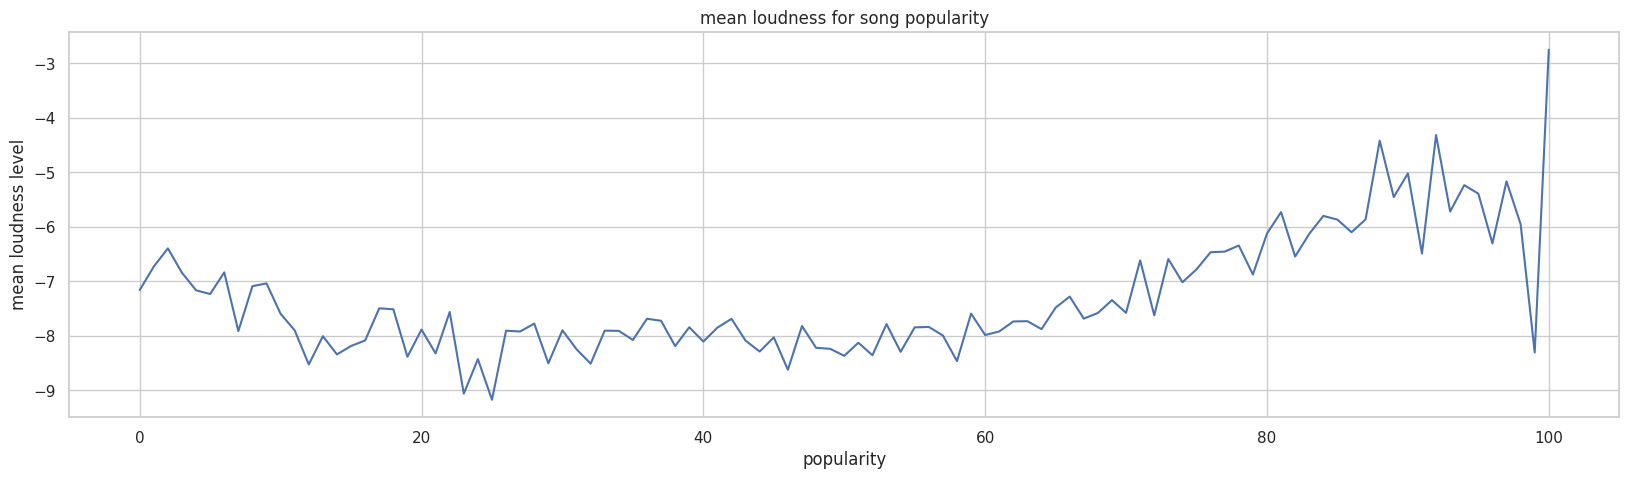

In [20]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = data.groupby("song_popularity")["loudness"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean loudness level')
axis.set_xlabel('popularity')
axis.set_title("mean loudness for song popularity")

##Инструментальность от популярности

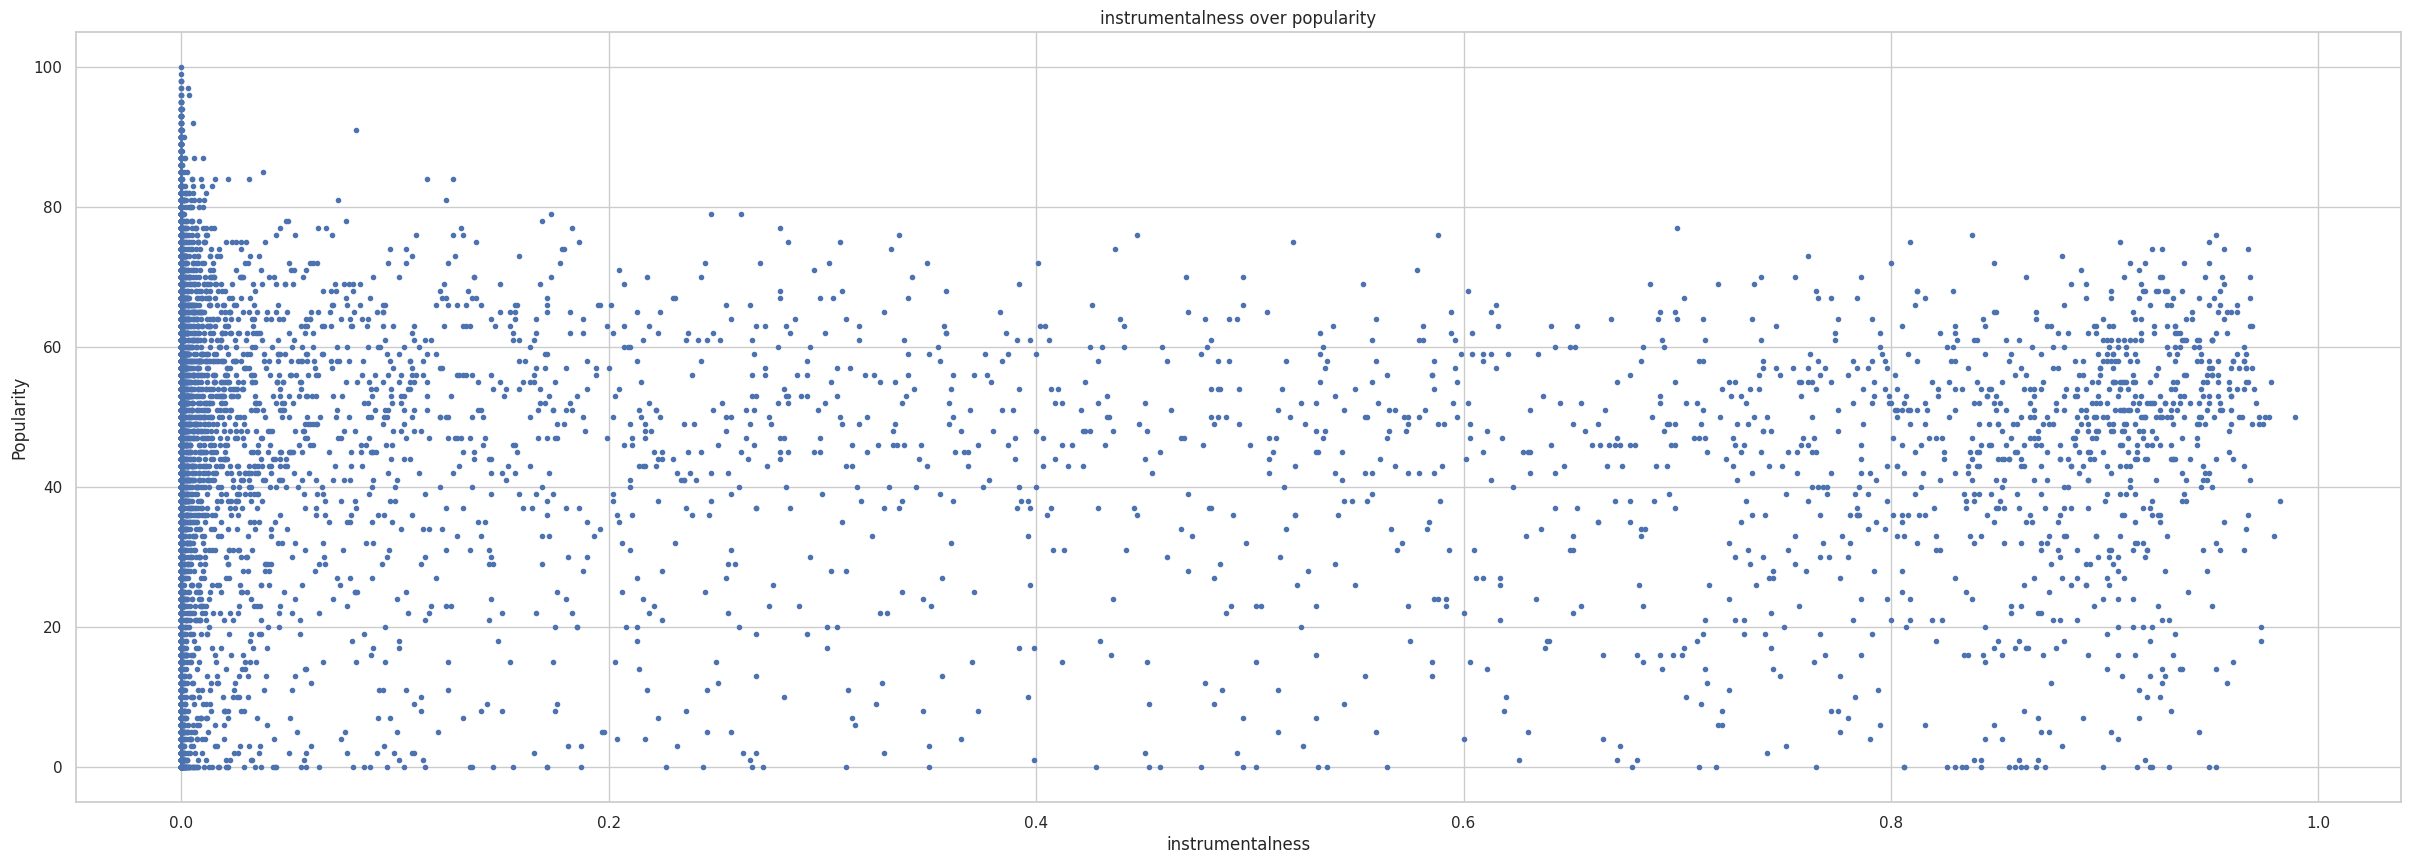

In [21]:
plt.figure(figsize=(30, 10))

xs = data['instrumentalness'].to_numpy()
ys = data['song_popularity'].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('instrumentalness')
plt.title('instrumentalness over popularity')
plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean instrumentalness for song popularity')

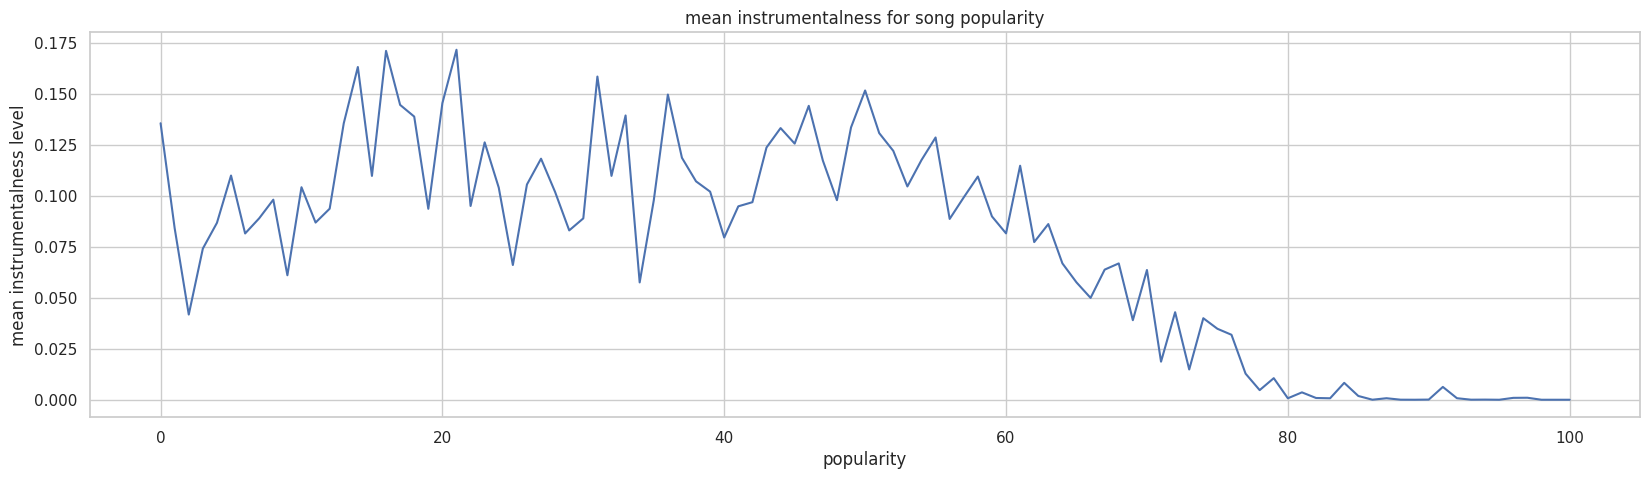

In [22]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = data.groupby('song_popularity')['instrumentalness'].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean instrumentalness level')
axis.set_xlabel('popularity')
axis.set_title('mean instrumentalness for song popularity')

##Позитивность от популярности

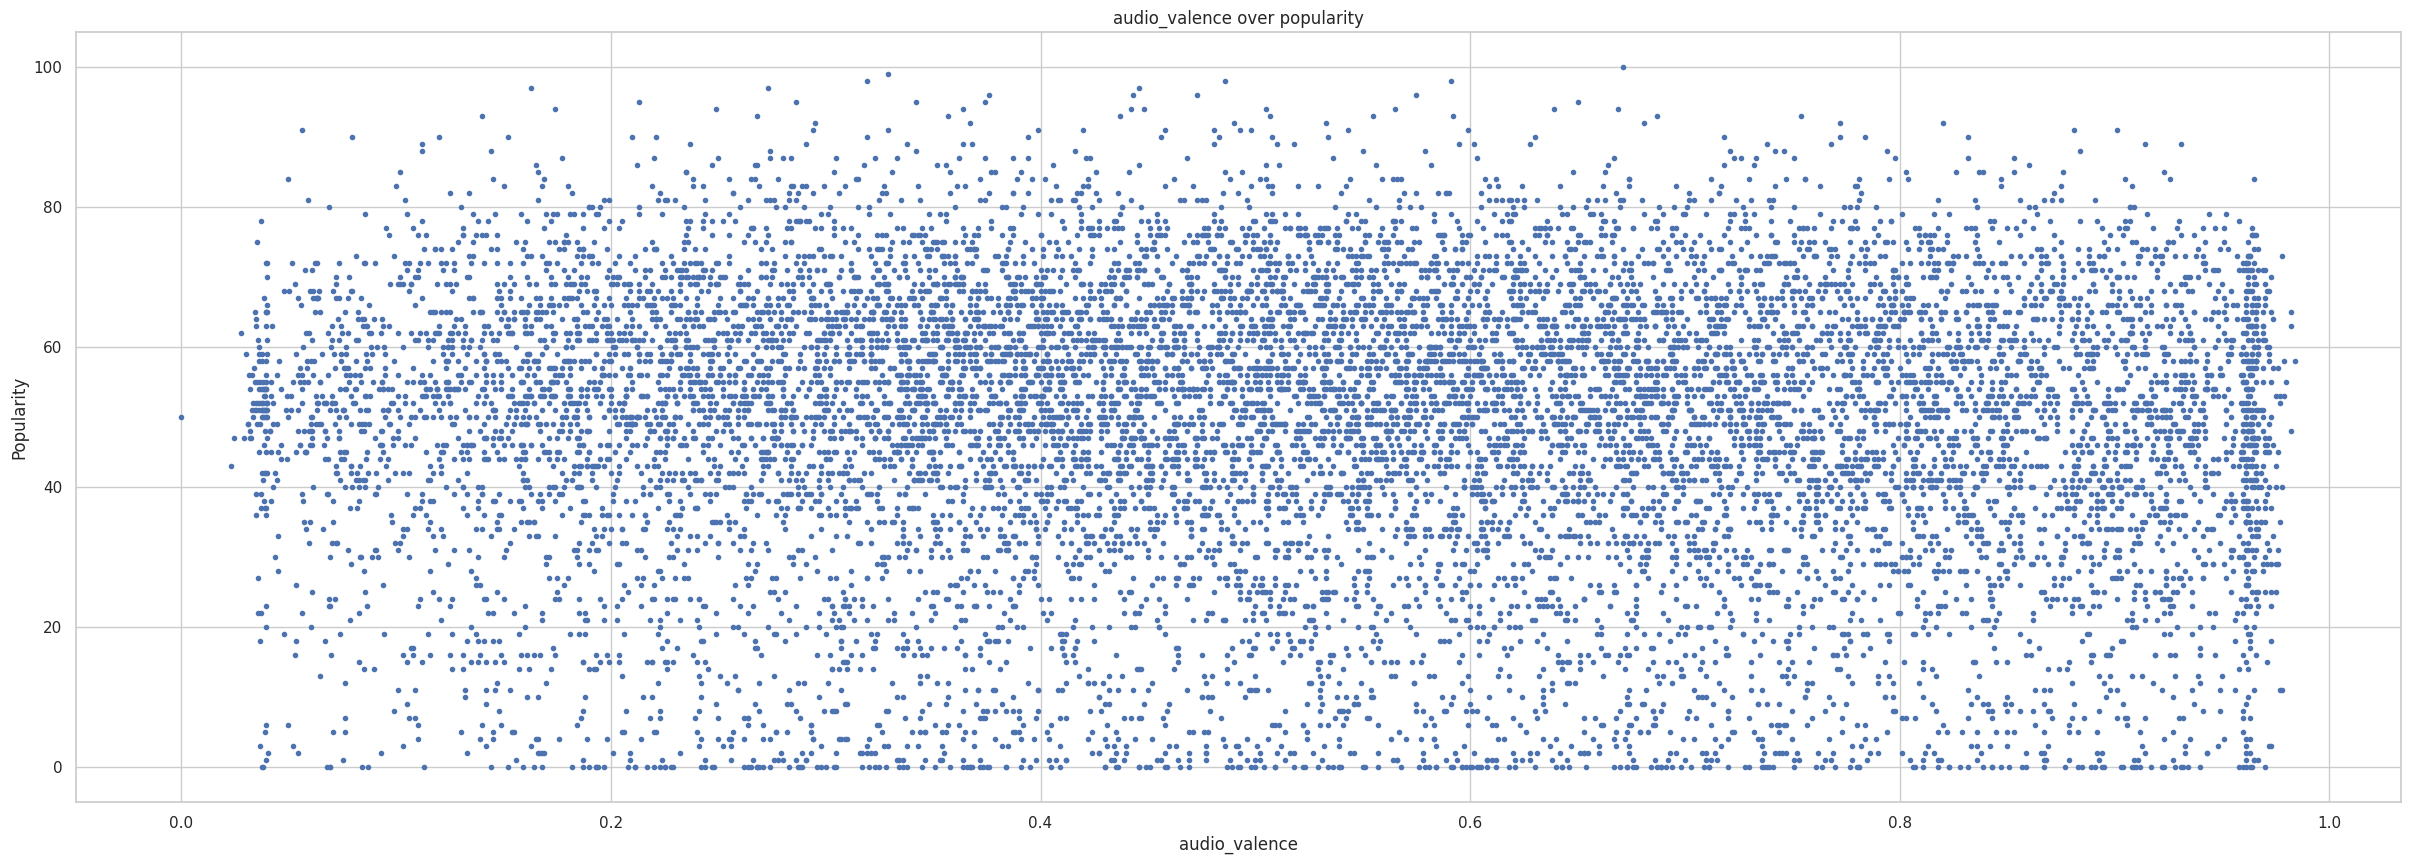

In [23]:
plt.figure(figsize=(30, 10))

xs = data['audio_valence'].to_numpy()
ys = data['song_popularity'].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('audio_valence')
plt.title('audio_valence over popularity')
plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean audio_valence for song popularity')

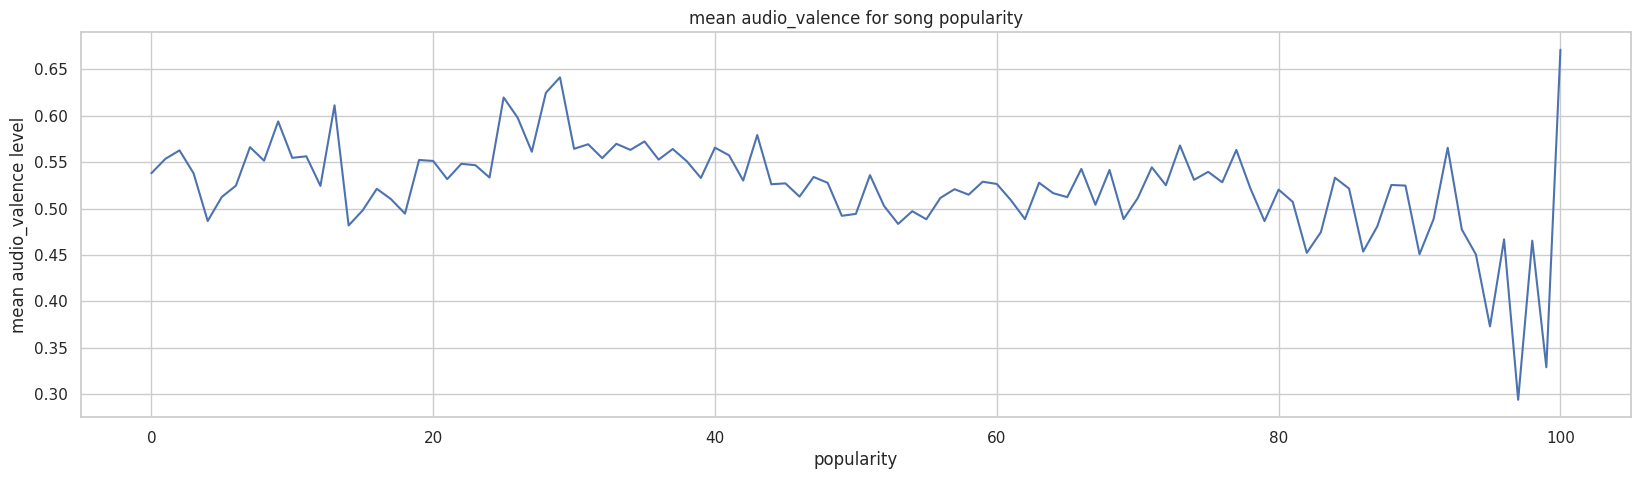

In [24]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = data.groupby('song_popularity')['audio_valence'].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean audio_valence level')
axis.set_xlabel('popularity')
axis.set_title('mean audio_valence for song popularity')

##Задача регрессии:

In [25]:
X = data.drop(['song_popularity', 'song_name'], axis=1)
y = data['song_popularity']

Обработаем категориальный признак key:

In [26]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X[['key']])
dummies = pd.DataFrame(enc.transform(X[['key']]),
                       columns=enc.get_feature_names_out(), index=X.index)
dummies.head()
X = pd.concat((X, dummies), axis=1).drop(['key'], axis=1)
X.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,1,0.0294,167.060,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0,0.0498,105.256,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,231733,0.008170,0.737,0.463,0.447000,0.2550,-7.828,1,0.0792,123.881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,1,0.1070,122.444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,1,0.0313,172.011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Нормализуем выборку:

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

Построим тестовую и тренировочную выборку:

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
N_train, _ = X_train.shape
N_test,  _ = X_test.shape
N_train, N_test

(9703, 3235)

##Линейная регрессия

In [133]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [134]:
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.022841588725325934, 0.024491367880516757)

In [135]:
model.score(X_test, y_test)

0.024491367880516757

In [136]:
MSE_train = ((y_train_pred - y_train)**2).mean()
MSE_test  = ((y_test_pred - y_test)**2).mean()
MSE_train, MSE_test

(399.43476652547645, 384.3084924646782)

In [137]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
print(RMSE_train, RMSE_test)

19.985864167592965 19.603787707090643


In [138]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['Linear Regression, all features', :] = (RMSE_train, RMSE_test)

In [139]:
RMSE_table

,train,test
"Linear Regression, all features",19.985864,19.603788


In [140]:
from sklearn.metrics import mean_squared_error, r2_score
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_train = r2_score(y_train, y_train_pred)
R2_test  = r2_score(y_test,  y_test_pred)
R2_table.loc['Linear Regression, all features', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.022842,0.024491


##Метод ближайших соседей:

In [141]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = KNeighborsRegressor(n_neighbors=20) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
RMSE_table.loc['k Nearest Neighbours', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",19.985864,19.603788
k Nearest Neighbours,19.305463,19.988349


In [142]:
R2_table.loc['k Nearest Neighbours', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.022842,0.024491
k Nearest Neighbours,0.088242,-0.014156


##Случайный лес. Подбор гиперпараметров

In [143]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
import numpy as np

k_arr = np.array([130, 170, 200, 220, 240, 270])
params = {
    'n_estimators': k_arr,
}

model = GridSearchCV(RandomForestRegressor(), params, scoring='neg_mean_squared_error', n_jobs = -1)
model.fit(X_train, y_train)

model.best_score_, model.best_params_


(-391.1131196334901, {'n_estimators': 220})

Построим график зависимости RMSE в зависимости от n_estimators:

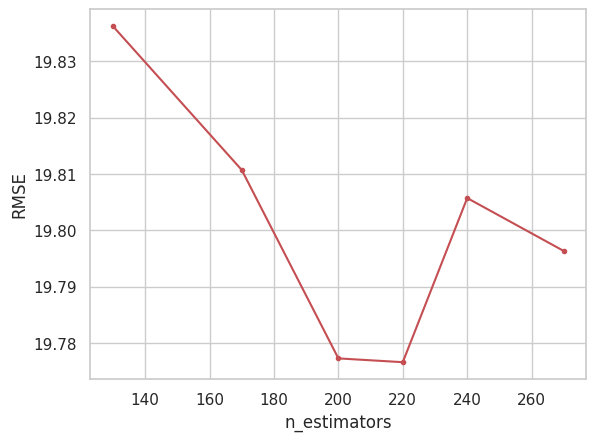

In [144]:
RMSE_arr = (-model.cv_results_['mean_test_score'])**0.5
plt.plot(k_arr, RMSE_arr, 'r.-')

#plt.grid()
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
pass

Как мы видим из графика, RMSE в диапазоне от 180 до 250 почти не меняется.

Теперь обучим модель при найденом оптимальном значении гиперпараметра:

In [145]:
model = RandomForestRegressor(n_estimators=model.best_params_['n_estimators']) # по умолчанию n_estimators=100
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [146]:
RMSE_table.loc['Random Forest', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",19.985864,19.603788
k Nearest Neighbours,19.305463,19.988349
Random Forest,7.350523,19.29164


In [147]:
R2_table.loc['Random Forest', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.022842,0.024491
k Nearest Neighbours,0.088242,-0.014156
Random Forest,0.867823,0.05531


##Градиентный спуск:

In [148]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)



In [149]:
RMSE_table.loc['Gradient Boosting', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",19.985864,19.603788
k Nearest Neighbours,19.305463,19.988349
Random Forest,7.350523,19.29164
Gradient Boosting,18.916814,19.245106


In [150]:
R2_table.loc['Gradient Boosting', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.022842,0.024491
k Nearest Neighbours,0.088242,-0.014156
Random Forest,0.867823,0.05531
Gradient Boosting,0.124583,0.059862


##Машина опорных векторов

In [151]:
from sklearn.svm import SVR
model = SVR(kernel = 'rbf')
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
RMSE_table.loc['Support Vector', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",19.985864,19.603788
k Nearest Neighbours,19.305463,19.988349
Random Forest,7.350523,19.29164
Gradient Boosting,18.916814,19.245106
Support Vector,19.77342,19.650919


In [152]:
R2_table.loc['Support Vector', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.022842,0.024491
k Nearest Neighbours,0.088242,-0.014156
Random Forest,0.867823,0.05531
Gradient Boosting,0.124583,0.059862
Support Vector,0.043505,0.019795


##Логистическая регрессия

In [153]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
RMSE_table.loc['Logistic Regression', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",19.985864,19.603788
k Nearest Neighbours,19.305463,19.988349
Random Forest,7.350523,19.29164
Gradient Boosting,18.916814,19.245106
Support Vector,19.77342,19.650919
Logistic Regression,24.245217,23.587196


In [154]:
R2_table.loc['Logistic Regression', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.022842,0.024491
k Nearest Neighbours,0.088242,-0.014156
Random Forest,0.867823,0.05531
Gradient Boosting,0.124583,0.059862
Support Vector,0.043505,0.019795
Logistic Regression,-0.438041,-0.412225


##Полносвязная нейронная сеть

In [155]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes = (10, 10), max_iter = 2000)
model.fit(X_train, y_train)



MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=2000)

In [156]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
RMSE_table.loc['MLPRegressor', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",19.985864,19.603788
k Nearest Neighbours,19.305463,19.988349
Random Forest,7.350523,19.29164
Gradient Boosting,18.916814,19.245106
Support Vector,19.77342,19.650919
Logistic Regression,24.245217,23.587196
MLPRegressor,19.517461,19.517698


In [157]:
R2_table.loc['MLPRegressor', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.022842,0.024491
k Nearest Neighbours,0.088242,-0.014156
Random Forest,0.867823,0.05531
Gradient Boosting,0.124583,0.059862
Support Vector,0.043505,0.019795
Logistic Regression,-0.438041,-0.412225
MLPRegressor,0.068108,0.03304


##Вывод:

Исходя из полученных результатов, можем определить, что предсказать популярность трека по его характеристикам можно только с достаточно большой ошибкой. Наибольно успешно с поставленной задачей справился метод случайного леса, следом за ним идет градиентный спуск, за ним полносвязная нейронная сеть, за ним машина опорных векторов и линейная регрессия, и метод ближайших соседей с логистической регрессией справились с задачей хуже всего. В большинстве используемых классификаторов мы столкнулись с эффектом переобучения, так как коэффициент детерминации r2 на тренировочной выборке значительно лучше, чем на тестовой. Также мы можем сказать, что на популярность трека положительно влияют танцевальность, громкость и схожесть с речью. Скорее всего, это связано с популярностью сейчас такого жанра музыки как хип-хоп. Отрицательно на популярность трека влияют его инструментальность, количество акустического материала, большое количество "живого" исполнения и "позитивность" трека.